# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [23]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [24]:
train, test = keras.datasets.cifar10.load_data()

In [25]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [26]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [27]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer'+str(i+1))(input_layer)
        else:    
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer'+str(i+1))(x)
    output_layer = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [28]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.9

In [29]:
def optimizer(optimizer):
    
    # Training with different learning rate
    """
    建立你的訓練與實驗迴圈並蒐集資料
    """
    results = {}
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['accuracy']
        valid_acc = model.history.history['val_accuracy']
        
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
    # Plot
    """
    將實驗結果繪出
    """
    color_bar = ["r", "g", "b", "y", "m", "k"]
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()    

    

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 110us/step - loss: 1.9348 - accuracy: 0.3039 - val_loss: 1.7489 - val_accuracy: 0.3766
Epoch 2/20
50000/50000 [==============================] - 6s 112us/step - loss: 1.7131 - accuracy: 0.3857 - val_loss: 1.7090 - val_accuracy: 0.3933
Epoch 3/20
50000/50000 [==============================] - 5s 110us/step - loss: 1.6276 - accuracy: 0.4195 - val_loss: 1.5844 - val_accuracy: 0.4284
Epoch 4/20
50000/50000 [==============================] - 5s 109us/step - loss: 1.5514 - accuracy: 0.4452 - val_loss: 1.5402 - val_accuracy: 0.4499
Epoch 5/20
50000/50000 [==============================] - 6s 112us/step - loss: 1.5170 - accuracy: 0.4588 - val_loss: 1.5189 - val_accuracy: 0.4603
Epoch 6/20
50000/50000 [==============================] - 6s 110us/step - loss: 1.4868 - accuracy: 0.4681 - val_loss: 1.5033 - val_accuracy: 0.4626
Epoch 7/20
50000/50000 [==============================] - 6s 1

50000/50000 [==============================] - 6s 118us/step - loss: 1.9371 - accuracy: 0.3025 - val_loss: 1.7732 - val_accuracy: 0.3612
Epoch 2/20
50000/50000 [==============================] - 6s 115us/step - loss: 1.7114 - accuracy: 0.3883 - val_loss: 1.6248 - val_accuracy: 0.4242
Epoch 3/20
50000/50000 [==============================] - 6s 111us/step - loss: 1.6188 - accuracy: 0.4205 - val_loss: 1.5874 - val_accuracy: 0.4377
Epoch 4/20
50000/50000 [==============================] - 6s 112us/step - loss: 1.5586 - accuracy: 0.4448 - val_loss: 1.6096 - val_accuracy: 0.4231
Epoch 5/20
50000/50000 [==============================] - 6s 112us/step - loss: 1.5119 - accuracy: 0.4610 - val_loss: 1.5258 - val_accuracy: 0.4536
Epoch 6/20
50000/50000 [==============================] - 6s 111us/step - loss: 1.4768 - accuracy: 0.4718 - val_loss: 1.4625 - val_accuracy: 0.4800
Epoch 7/20
50000/50000 [==============================] - 6s 111us/step - loss: 1.4385 - accuracy: 0.4873 - val_loss: 1.448

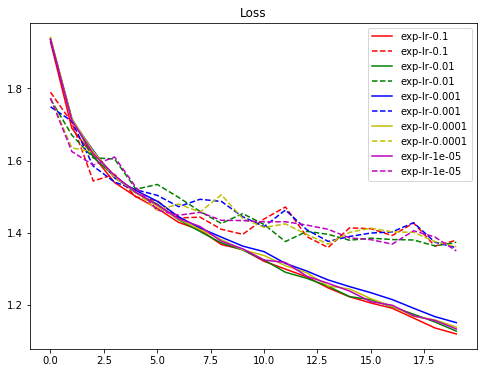

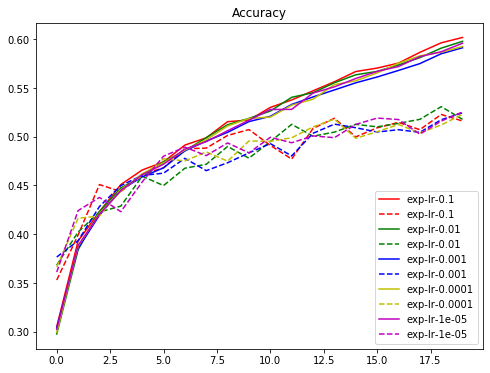

In [30]:
optimizer('adam')

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 105us/step - loss: 2.0550 - accuracy: 0.2638 - val_loss: 1.9542 - val_accuracy: 0.2875
Epoch 2/20
50000/50000 [==============================] - 5s 93us/step - loss: 1.8804 - accuracy: 0.3373 - val_loss: 1.8802 - val_accuracy: 0.3192
Epoch 3/20
50000/50000 [==============================] - 4s 87us/step - loss: 1.8109 - accuracy: 0.3610 - val_loss: 1.8406 - val_accuracy: 0.3399
Epoch 4/20
50000/50000 [==============================] - 4s 88us/step - loss: 1.7646 - accuracy: 0.3792 - val_loss: 1.8220 - val_accuracy: 0.3424
Epoch 5/20
50000/50000 [==============================] - 4s 87us/step - loss: 1.7279 - accuracy: 0.3938 - val_loss: 1.7441 - val_accuracy: 0.3796
Epoch 6/20
50000/50000 [==============================] - 4s 89us/step - loss: 1.7015 - accuracy: 0.4022 - val_loss: 1.7721 - val_accuracy: 0.3735
Epoch 7/20
50000/50000 [==============================] - 4s 88us/s

50000/50000 [==============================] - 4s 80us/step - loss: 2.0672 - accuracy: 0.2580 - val_loss: 2.0058 - val_accuracy: 0.2677
Epoch 2/20
50000/50000 [==============================] - 4s 79us/step - loss: 1.8950 - accuracy: 0.3313 - val_loss: 1.8946 - val_accuracy: 0.3238
Epoch 3/20
50000/50000 [==============================] - 4s 81us/step - loss: 1.8228 - accuracy: 0.3610 - val_loss: 1.8293 - val_accuracy: 0.3588
Epoch 4/20
50000/50000 [==============================] - 4s 81us/step - loss: 1.7751 - accuracy: 0.3748 - val_loss: 1.8086 - val_accuracy: 0.3548
Epoch 5/20
50000/50000 [==============================] - 4s 79us/step - loss: 1.7330 - accuracy: 0.3899 - val_loss: 1.7458 - val_accuracy: 0.3829
Epoch 6/20
50000/50000 [==============================] - 4s 79us/step - loss: 1.7029 - accuracy: 0.3997 - val_loss: 1.6865 - val_accuracy: 0.4051
Epoch 7/20
50000/50000 [==============================] - 4s 79us/step - loss: 1.6739 - accuracy: 0.4099 - val_loss: 1.6774 - val

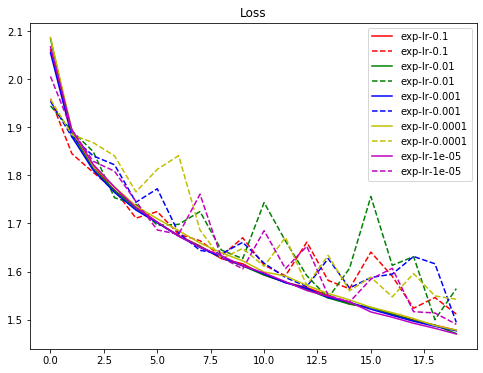

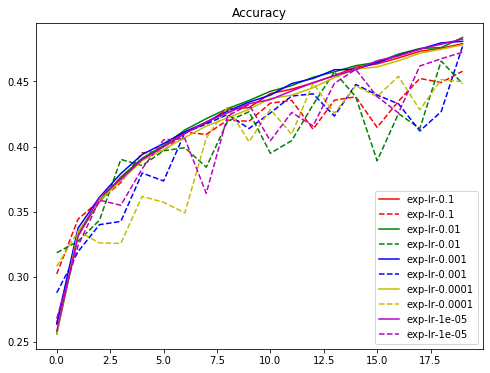

In [31]:
optimizer('sgd')

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 102us/step - loss: 2.2746 - accuracy: 0.2135 - val_loss: 1.9984 - val_accuracy: 0.2680
Epoch 2/20
50000/50000 [==============================] - 5s 106us/step - loss: 1.8817 - accuracy: 0.3187 - val_loss: 1.8938 - val_accuracy: 0.3022
Epoch 3/20
50000/50000 [==============================] - 5s 105us/step - loss: 1.7825 - accuracy: 0.3590 - val_loss: 1.7615 - val_accuracy: 0.3662
Epoch 4/20
50000/50000 [==============================] - 5s 101us/step - loss: 1.7112 - accuracy: 0.3868 - val_loss: 1.6697 - val_accuracy: 0.4001
Epoch 5/20
50000/50000 [==============================] - 5s 109us/step - loss: 1.6583 - accuracy: 0.4063 - val_loss: 1.7641 - val_accuracy: 0.3821
Epoch 6/20
50000/50000 [==============================] - 5s 110us/step - loss: 1.6071 - accuracy: 0.4231 - val_loss: 1.6556 - val_accuracy: 0.3969
Epoch 7/20
50000/50000 [==============================] - 5s 1

50000/50000 [==============================] - 5s 104us/step - loss: 2.3046 - accuracy: 0.2092 - val_loss: 1.9873 - val_accuracy: 0.2709
Epoch 2/20
50000/50000 [==============================] - 5s 102us/step - loss: 1.8968 - accuracy: 0.3157 - val_loss: 1.9996 - val_accuracy: 0.2725
Epoch 3/20
50000/50000 [==============================] - 5s 102us/step - loss: 1.7926 - accuracy: 0.3561 - val_loss: 1.6933 - val_accuracy: 0.3971
Epoch 4/20
50000/50000 [==============================] - 5s 99us/step - loss: 1.7160 - accuracy: 0.3837 - val_loss: 1.8569 - val_accuracy: 0.3387
Epoch 5/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.6580 - accuracy: 0.4111 - val_loss: 1.6678 - val_accuracy: 0.4111
Epoch 6/20
50000/50000 [==============================] - 5s 99us/step - loss: 1.6101 - accuracy: 0.4265 - val_loss: 1.6733 - val_accuracy: 0.4087
Epoch 7/20
50000/50000 [==============================] - 5s 99us/step - loss: 1.5648 - accuracy: 0.4411 - val_loss: 1.5612 -

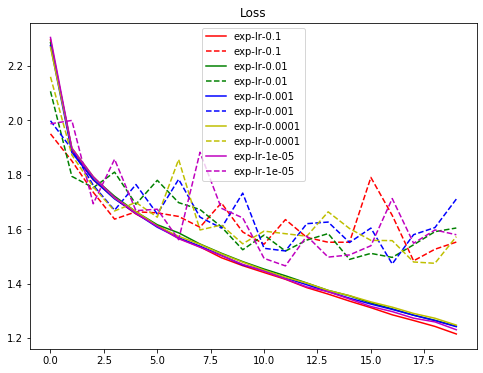

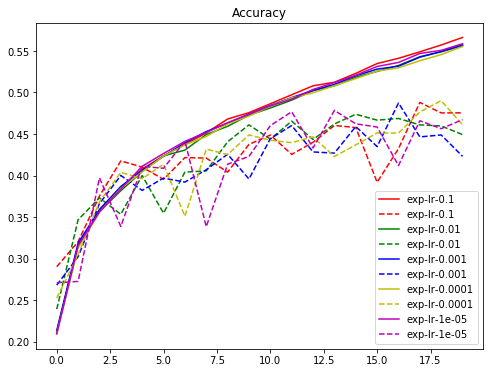

In [32]:
optimizer('RMSprop')

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 92us/step - loss: 2.7576 - accuracy: 0.2337 - val_loss: 1.9282 - val_accuracy: 0.2989
Epoch 2/20
50000/50000 [==============================] - 5s 92us/step - loss: 1.8469 - accuracy: 0.3348 - val_loss: 1.8202 - val_accuracy: 0.3236
Epoch 3/20
50000/50000 [==============================] - 5s 92us/step - loss: 1.7548 - accuracy: 0.3702 - val_loss: 1.7547 - val_accuracy: 0.3791
Epoch 4/20
50000/50000 [==============================] - 5s 93us/step - loss: 1.6956 - accuracy: 0.3921 - val_loss: 1.6863 - val_accuracy: 0.3917
Epoch 5/20
50000/50000 [==============================] - 5s 97us/step - loss: 1.6523 - accuracy: 0.4108 - val_loss: 1.6501 - val_accuracy: 0.4089
Epoch 6/20
50000/50000 [==============================] - 6s 119us/step - loss: 1.6132 - accuracy: 0.4262 - val_loss: 1.6084 - val_accuracy: 0.4210
Epoch 7/20
50000/50000 [==============================] - 6s 115us/

50000/50000 [==============================] - 4s 90us/step - loss: 2.7387 - accuracy: 0.2433 - val_loss: 1.9660 - val_accuracy: 0.2806
Epoch 2/20
50000/50000 [==============================] - 5s 90us/step - loss: 1.8362 - accuracy: 0.3413 - val_loss: 1.7896 - val_accuracy: 0.3515
Epoch 3/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.7407 - accuracy: 0.3780 - val_loss: 1.8108 - val_accuracy: 0.3472
Epoch 4/20
50000/50000 [==============================] - 5s 98us/step - loss: 1.6823 - accuracy: 0.4013 - val_loss: 1.7161 - val_accuracy: 0.3855
Epoch 5/20
50000/50000 [==============================] - 5s 97us/step - loss: 1.6336 - accuracy: 0.4203 - val_loss: 1.6332 - val_accuracy: 0.4241
Epoch 6/20
50000/50000 [==============================] - 5s 102us/step - loss: 1.6003 - accuracy: 0.4323 - val_loss: 1.6684 - val_accuracy: 0.4032
Epoch 7/20
50000/50000 [==============================] - 5s 94us/step - loss: 1.5671 - accuracy: 0.4432 - val_loss: 1.5891 - v

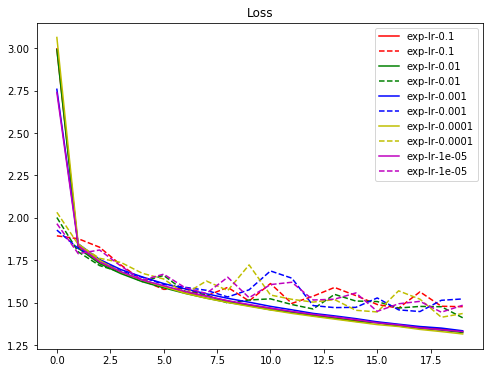

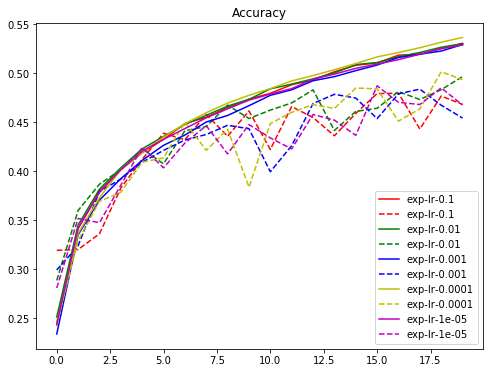

In [33]:
optimizer('AdaGrad')